In [1]:
import BioSimSpace as BSS
import sys
import networkx as nx
import pickle
import itertools as it

import warnings
warnings.filterwarnings(action='once')


try:
    import pipeline
except:
    print("adding code to the pythonpath...")
    code = '/home/anna/Documents/code/python'
    if code not in sys.path:
        sys.path.insert(1, code)
    import pipeline

from pipeline import *
from pipeline.analysis import *



Sending anonymous Sire usage statistics to http://siremol.org.
For more information, see http://siremol.org/analytics
To disable, set the environment variable 'SIRE_DONT_PHONEHOME' to 1
To see the information sent, set the environment variable 
SIRE_VERBOSE_PHONEHOME equal to 1. To silence this message, set
the environment variable SIRE_SILENT_PHONEHOME to 1.



Warning on use of the timeseries module: If the inherent timescales of the system are long compared to those being analyzed, this statistical inefficiency may be an underestimate.  The estimate presumes the use of many statistically independent samples.  Tests should be performed to assess whether this condition is satisfied.   Be cautious in the interpretation of the data.
/home/anna/anaconda3/envs/biosimspace-dev/lib/python3.9/site-packages/numpy/core/getlimits.py:500: UserWarning: The value of the smallest subnormal for <class 'numpy.float64'> type is zero.
  setattr(self, word, getattr(machar, word).flat[0])
/home/anna/anaconda3/envs/biosimspace-dev/lib/python3.9/site-packages/numpy/core/getlimits.py:89: UserWarning: The value of the smallest subnormal for <class 'numpy.float64'> type is zero.
  return self._float_to_str(self.smallest_subnormal)
/home/anna/anaconda3/envs/biosimspace-dev/lib/python3.9/site-packages/numpy/core/getlimits.py:500: UserWarning: The value of the smallest 

In [7]:
for prot, net in it.product(["tyk2","p38","mcl1"],["rbfenn","lomap"]):

    results_files = ["/home/anna/Documents/code/test/final_summary_SOMD_MBAR_alchemlyb_benchmark.csv"]
    engine = "SOMD"
    output_folder = "/home/anna/Documents/code/test"
    net_file = f"/home/anna/Documents/benchmark/{prot}_benchmark/execution_model/network_{net}.dat"
    weight_file = f"/home/anna/Documents/benchmark/{prot}_benchmark/execution_model/network_{net}_scores.dat"

    perturbations, ligands, mod_results_files = get_info_network(results_files, net_file, extra_options={"engine":engine})

    graph_x = graph(ligands, perturbations)
    graph_x.add_weight(weight_file)
    # graph_x.draw_graph()
    avg_weighted = graph_x.get_average_weighted_simple_paths()
    print(f"{prot} {net} is {avg_weighted}")

    with open(f"{output_folder}/graph_{prot}_{net}.pickle", 'wb') as handle:
        pickle.dump(graph_x.graph, handle)

there are : 1 results files.
using /home/anna/Documents/code/test to write the results as none specified...
tyk2 rbfenn is 34.3569831295206
there are : 1 results files.
using /home/anna/Documents/code/test to write the results as none specified...
tyk2 lomap is 8.711443628278584
there are : 1 results files.
using /home/anna/Documents/code/test to write the results as none specified...
p38 rbfenn is 1766.0956835143988
there are : 1 results files.
using /home/anna/Documents/code/test to write the results as none specified...
p38 lomap is 36.08531894778112
there are : 1 results files.
using /home/anna/Documents/code/test to write the results as none specified...
mcl1 rbfenn is 43.26526059340567
there are : 1 results files.
using /home/anna/Documents/code/test to write the results as none specified...
mcl1 lomap is 53.95026406713818


In [8]:
# cycles = graph.cycle_closures()
# print(cycles)

nx.get_edge_attributes(graph_x.graph, "weight")

print(len(perturbations))

48


In [8]:

with open(f"{output_folder}/graph_tyk2_rbfenn.pickle", "rb") as file:
    graph_t = pickle.load(file)
print(type(graph_t))
nx.get_edge_attributes(graph_t, "weight")

<class 'networkx.classes.graph.Graph'>


{('lig_ejm45', 'lig_ejm53'): 0.09933,
 ('lig_ejm45', 'lig_ejm55'): 0.1367,
 ('lig_ejm45', 'lig_ejm42'): 0.23437,
 ('lig_ejm44', 'lig_ejm54'): 0.11444,
 ('lig_ejm44', 'lig_ejm55'): 0.26,
 ('lig_ejm44', 'lig_ejm49'): 0.26079,
 ('lig_ejm44', 'lig_ejm42'): 0.30691,
 ('lig_ejm44', 'lig_ejm31'): 0.34516,
 ('lig_ejm44', 'lig_ejm43'): 0.35593,
 ('lig_ejm54', 'lig_ejm55'): 0.12815,
 ('lig_ejm48', 'lig_ejm55'): 0.13334,
 ('lig_ejm48', 'lig_ejm42'): 0.22289,
 ('lig_ejm55', 'lig_ejm42'): 0.30664,
 ('lig_ejm43', 'lig_ejm46'): 0.14135,
 ('lig_ejm43', 'lig_ejm47'): 0.16209,
 ('lig_ejm43', 'lig_ejm50'): 0.23105,
 ('lig_ejm43', 'lig_ejm42'): 0.35593,
 ('lig_ejm47', 'lig_ejm42'): 0.21851,
 ('lig_ejm42', 'lig_ejm53'): 0.20372,
 ('lig_ejm42', 'lig_ejm46'): 0.20628,
 ('lig_ejm42', 'lig_ejm50'): 0.23669,
 ('lig_ejm42', 'lig_ejm31'): 0.29608,
 ('lig_ejm46', 'lig_jmc27'): 0.35906,
 ('lig_ejm46', 'lig_jmc23'): 0.36255,
 ('lig_ejm49', 'lig_ejm31'): 0.28213,
 ('lig_jmc27', 'lig_jmc30'): 0.31176,
 ('lig_jmc27', '

In [2]:
import MDAnalysis as mda
import shutil

try:
    import pipeline
except:
    print("adding code to the pythonpath...")
    code = '/home/anna/Documents/code/python'
    if code not in sys.path:
        sys.path.insert(1, code)
    import pipeline
from pipeline.utils import *

adding code to the pythonpath...


Warning on use of the timeseries module: If the inherent timescales of the system are long compared to those being analyzed, this statistical inefficiency may be an underestimate.  The estimate presumes the use of many statistically independent samples.  Tests should be performed to assess whether this condition is satisfied.   Be cautious in the interpretation of the data.



Sending anonymous Sire usage statistics to http://siremol.org.
For more information, see http://siremol.org/analytics
To disable, set the environment variable 'SIRE_DONT_PHONEHOME' to 1
To see the information sent, set the environment variable 
SIRE_VERBOSE_PHONEHOME equal to 1. To silence this message, set
the environment variable SIRE_SILENT_PHONEHOME to 1.



In [5]:
direc = "/home/anna/Documents/code/test/outputs/SOMD/lig_ejm31~lig_ejm42/bound_0/lambda_0.0000"

# check only for specified lambdas
# do all w try so doesnt fail for one

# create mda universe based on file
if "SOMD" in direc:
    # must be parm7 for mda
    shutil.copy(f"{direc}/somd.prm7",f"{direc}/somd.parm7")
    coord_file = validate.file_path(f"{direc}/somd.parm7")

    # combine traj files
    dcd_files = []
    for file in os.listdir(direc):
        if "dcd" in file:
            dcd_files.append(validate.file_path(f"{direc}/{file}"))
    if not dcd_files:
        raise ValueError("there are no dcd trajectory files for somd in this folder.")


In [6]:

u = mda.Universe(coord_file, dcd_files)
print(u.trajectory.time)


0.0


In [25]:
timesteps = [u.trajectory.ts for ts in u.trajectory]
timestep_freq = int(len(timesteps)/4)
timesteps_used = [0, timestep_freq-1, (timestep_freq*2)-1, (timestep_freq*3)-1, int(len(timesteps)-1)]

for time in timesteps_used:
    u.trajectory[time]
    with mda.Writer(f"{direc}/system_{str(time)}.pdb") as W:
        W.write(u)

250
[0, 249, 499, 749, 999]


In [35]:
u.select_atoms("resname LIG")

3995.9996480323944

In [68]:
u = mda.Universe(coord_file, dcd_files)
ref = mda.Universe(coord_file, dcd_files)

import MDAnalysis.analysis.rms
R = MDAnalysis.analysis.rms.RMSD(u, ref,
           select="backbone",
           groupselections=["resname LIG and resname LIG",
                            "backbone and resname LIG",
                            "resname LIG and resid 45"])
R.run()


Text(0, 0.5, 'RMSD ($\\AA$)')

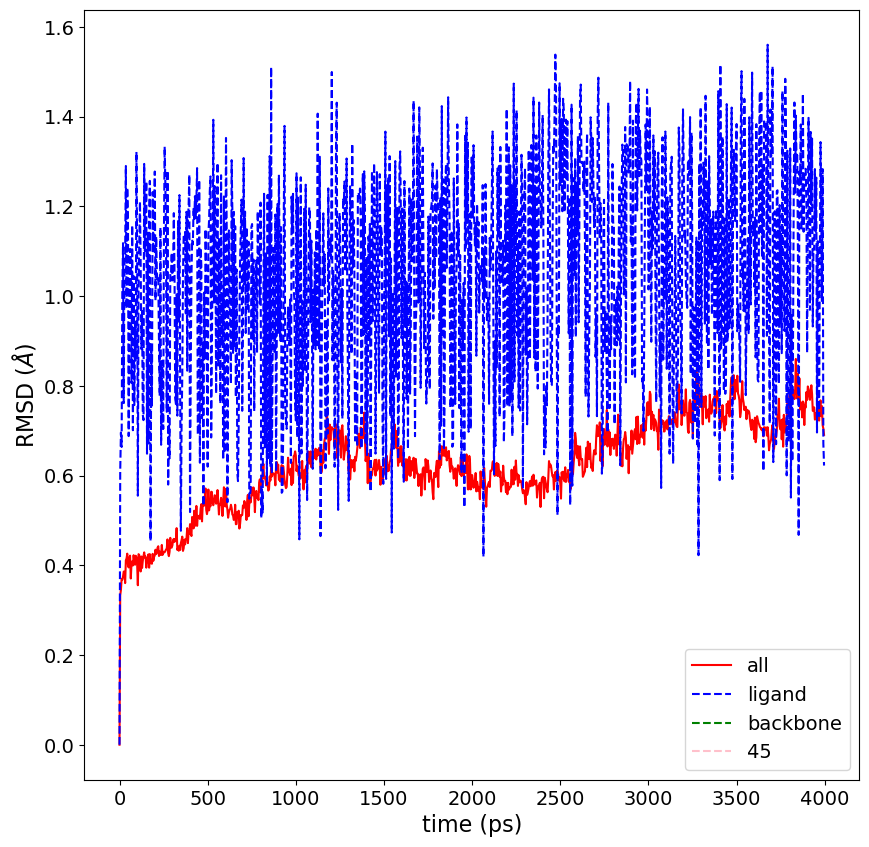

In [70]:

import matplotlib.pyplot as plt
rmsd = R.rmsd.T   # transpose makes it easier for plotting
time = rmsd[1]
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
ax.plot(time, rmsd[2], 'k-', color="red",  label="all")
ax.plot(time, rmsd[3], 'k--', color="blue", label="ligand")
ax.plot(time, rmsd[4], 'r--', color="green", label="backbone")
ax.plot(time, rmsd[5], 'b--', color="pink", label="45")
ax.legend(loc="best")
ax.set_xlabel("time (ps)")
ax.set_ylabel(r"RMSD ($\AA$)")
# fig.savefig("rmsd_all_CORE_LID_NMP_ref1AKE.pdf")

Text(0, 0.5, 'RMSD of ligand ($\\AA$)')

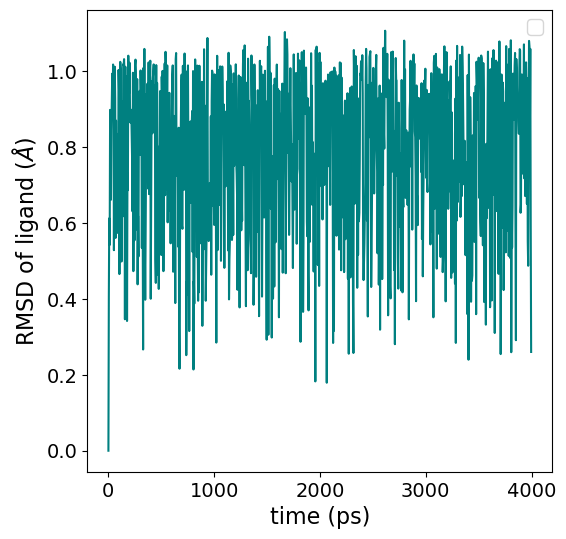

In [87]:
u = mda.Universe(coord_file, dcd_files)
ref = mda.Universe(coord_file, dcd_files)

import MDAnalysis.analysis.rms
R = MDAnalysis.analysis.rms.RMSD(u, ref,
           select="resname LIG",
           groupselections=["resname LIG and resname LIG",
                            "backbone and resname LIG"])
R.run()

import matplotlib.pyplot as plt
rmsd = R.rmsd.T   # transpose makes it easier for plotting
time = rmsd[1]
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111)
ax.plot(time, rmsd[2], 'k-', color="teal")
ax.legend(loc="best")
ax.set_xlabel("time (ps)")
ax.set_ylabel(r"RMSD of ligand ($\AA$)")
# fig.savefig("rmsd_all_CORE_LID_NMP_ref1AKE.pdf")

In [80]:
rmsd = R.rmsd.T

In [85]:
max(rmsd[2])

1.1059510069100587

In [ ]:
import MDAnalysis
from MDAnalysis.tests.datafiles import PSF,DCD,CRD
u = MDAnalysis.Universe(PSF,DCD)
ref = MDAnalysis.Universe(PSF,DCD)     # reference closed AdK (1AKE) (with the default ref_frame=0)
#ref = MDAnalysis.Universe(PSF,CRD)    # reference open AdK (4AKE)

import MDAnalysis.analysis.rms

R = MDAnalysis.analysis.rms.RMSD(u, ref,
           select="backbone",             # superimpose on whole backbone of the whole protein
           groupselections=["backbone and (resid 1-29 or resid 60-121 or resid 160-214)",   # CORE
                            "backbone and resid 122-159",                                   # LID
                            "backbone and resid 30-59"])                                    # NMP
R.run()

import matplotlib.pyplot as plt
rmsd = R.rmsd.T   # transpose makes it easier for plotting
time = rmsd[1]
fig = plt.figure(figsize=(4,4))
ax = fig.add_subplot(111)
ax.plot(time, rmsd[2], 'k-',  label="all")
ax.plot(time, rmsd[3], 'k--', label="CORE")
ax.plot(time, rmsd[4], 'r--', label="LID")
ax.plot(time, rmsd[5], 'b--', label="NMP")
ax.legend(loc="best")
ax.set_xlabel("time (ps)")
ax.set_ylabel(r"RMSD ($\AA$)")
fig.savefig("rmsd_all_CORE_LID_NMP_ref1AKE.pdf")

In [34]:
res_dir = "/home/anna/Documents/benchmark/tyk2_benchmark/outputs"

res_obj = analysis_engine()

['repeat_1_GROMACS_MBAR_alchemlyb_benchmark.csv', 'AMBER_extracted', 'GROMACS_extracted', 'results_1_SOMD.csv', 'repeat_2_GROMACS_MBAR_alchemlyb_benchmark.csv', 'ana_pre_rerun', 'repeat_1_SOMD_MBAR_alchemlyb_benchmark.csv', 'analysis_network.png', 'repeat_1_AMBER_MBAR_alchemlyb_benchmark.csv', 'results_0_AMBER_SOMD_GROMACS.csv', 'repeat_0_SOMD_MBAR_alchemlyb_benchmark.csv', 'old', 'repeat_0_AMBER_MBAR_alchemlyb_benchmark.csv', 'AMBER', 'results', 'repeat_2_SOMD_MBAR_alchemlyb_benchmark.csv', 'SOMD_extracted', 'results_1_AMBER_SOMD_GROMACS.csv', 'repeat_2_AMBER_MBAR_alchemlyb_benchmark.csv', 'SOMD', 'results_0_SOMD.csv', 'repeat_0_GROMACS_MBAR_alchemlyb_benchmark.csv', 'final_summary_GROMACS_MBAR_alchemlyb_benchmark.csv', 'final_summary_SOMD_MBAR_alchemlyb_benchmark.csv', 'GROMACS', 'final_summary_AMBER_MBAR_alchemlyb_benchmark.csv']
['/home/anna/Documents/benchmark/tyk2_benchmark/outputs/repeat_1_GROMACS_MBAR_alchemlyb_benchmark.csv', '/home/anna/Documents/benchmark/tyk2_benchmark/outp

In [30]:
files

['repeat_1_GROMACS_MBAR_alchemlyb_benchmark.csv',
 'GROMACS_extracted',
 'repeat_2_GROMACS_MBAR_alchemlyb_benchmark.csv',
 'repeat_1_SOMD_MBAR_alchemlyb_benchmark.csv',
 'repeat_1_AMBER_MBAR_alchemlyb_benchmark.csv',
 'repeat_0_SOMD_MBAR_alchemlyb_benchmark.csv',
 'repeat_0_AMBER_MBAR_alchemlyb_benchmark.csv',
 'results',
 'repeat_2_SOMD_MBAR_alchemlyb_benchmark.csv',
 'results_1_AMBER_SOMD_GROMACS.csv',
 'repeat_2_AMBER_MBAR_alchemlyb_benchmark.csv',
 'results_0_SOMD.csv',
 'repeat_0_GROMACS_MBAR_alchemlyb_benchmark.csv',
 'final_summary_SOMD_MBAR_alchemlyb_benchmark.csv',
 'final_summary_AMBER_MBAR_alchemlyb_benchmark.csv']